In [1]:
%load_ext autoreload
%autoreload 2
from dark_matters.input import read_input_file,read_dm_output
from dark_matters.calculations import run_calculation
from dark_matters.output import fits_map,make_output
from astropy import units
from astropy.coordinates import SkyCoord
from matplotlib import pyplot as plt
import numpy as np 

In [2]:
data_sets = read_input_file("coma_diffSph-1.yaml")
print(data_sets)

{'halo_data': {'name': 'coma', 'profile': 'nfw', 'scale': np.float64(0.333), 'distance': np.float64(105.343), 'z': 0.023, 'mvir': np.float64(1240000000000000.0), 'rvir': np.float64(3.0)}, 'mag_data': {'mag_norm': np.float64(4.7), 'profile': 'flat', 'mag_func_lock': False}, 'gas_data': {'gas_norm': np.float64(0.01), 'profile': 'exp', 'scale': np.float64(1.5)}, 'diff_data': {'diff_constant': np.float64(3e+28), 'diff_index': 0.3333333333333333, 'diff_rmax': np.float64(6.0)}, 'part_data': {'em_model': 'annihilation', 'part_model': 'mumu', 'cross_section': np.float64(3e-26)}, 'calc_data': {'os_max_steps': 20, 'calc_mode': 'sb', 'e_sample_number': 50, 'electron_mode': 'green-python', 'f_sample_limits': array([1.e+01, 1.e+06]), 'f_sample_num': 70, 'f_sample_spacing': 'log', 'freq_mode': 'radio', 'log10_r_sample_min_factor': -3, 'm_wimp': array([  10.,  100., 1000.]), 'r_sample_num': 51}, 'cosmo_data': {}}


In [3]:
output_data = run_calculation(**data_sets)

#######################################################
                   Fatal Error
#######################################################


SystemExit: Green's functions are currently disabled! Use 'os-python' as the value of 'electron_mode' instead

/home/kaium/project_practice/DarkMatters/project_env/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


{'electron_data': 'GeV/cm^3', 'radio_em_data': 'GeV/cm^3', 'primary_em_data': 'GeV/cm^3', 'secondary_em_data': 'GeV/cm^3', 'f_sample_values': 'MHz', 'final_data': 'Jy/arcmin^2', 'ang_sample_values': 'arcmin', 'r_sample_values': 'Mpc', 'e_sample_values': 'GeV'}


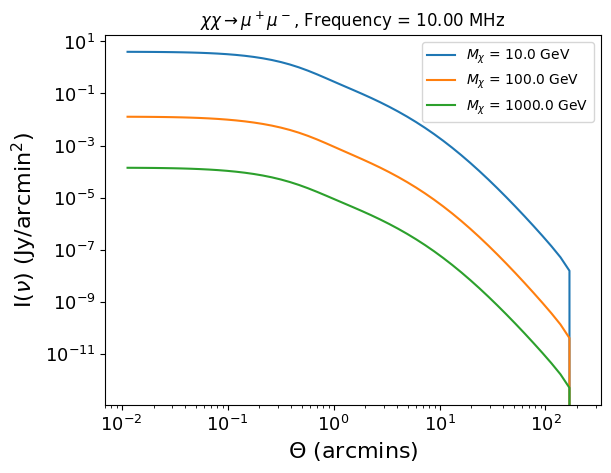

In [8]:
freq_index = (np.abs(output_data['calc_data']['results']['f_sample_values']- 10.0)).argmin()
print(output_data['calc_data']['results']['units'])
for i in range(len(output_data['calc_data']['m_wimp'])):
    plt.plot(output_data['calc_data']['results']['ang_sample_values'],np.array(output_data['calc_data']['results']['final_data'][i][freq_index])/11818102.86,label=r"$M_\chi$ = "+str(output_data['calc_data']['m_wimp'][i])+" GeV")
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"I$(\nu)$ (Jy/arcmin$^2$)",fontsize=16)
plt.xlabel(r"$\Theta$ (arcmins)",fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(r"$\chi \chi \rightarrow \mu^+ \mu^-$, "+f"Frequency = {output_data['calc_data']['results']['f_sample_values'][freq_index]:.2f} MHz")
plt.legend()
plt.show()